In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import sklearn
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
from string import punctuation
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import tensorflow  as tf
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
train =pd.read_csv('train_data.csv')
train

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция,Фейк
0,10497,"Reporter, Agri Investor","US, ,",KHR,NaN,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing,0
1,8219,Software Engineer,"US, VA, Herndon",Software Engineering,NaN,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,NaN,NaN,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering,0
2,5342,Structural Engineer,"NL, ZH, Rotterdam",onshore,NaN,NaN,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0
3,1916,Senior Publishing Specialist,"US, ,",NaN,NaN,NaN,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
4,1811,Sales Representative,"CA, BC, Vancouver",Sales & Marketing,NaN,NaN,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,English Teacher Abroad,"CA, ON, Mississauga",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
10724,15218,Account Manager,"US, CA, San Francisco",NaN,65000-90000,Addy's mission is to make every delivery effic...,Here at Addy we are building the easiest way f...,The ideal candidate would possess strong inter...,Employee stock optionsComprehensive health ins...,0,0,Full-time,Not Applicable,Bachelor's Degree,Internet,Sales,0
10725,3755,Front Desk Brokerage Administrator,"US, NJ, Elmwood Park",NaN,32000-34000,"With over 1,300 investment professionals locat...","Marcus &amp; Millichap, the nation's leading c...",Required Knowledge and/or Experience• Strong k...,NaN,0,0,Full-time,NaN,High School or equivalent,Real Estate,Administrative,0
10726,7913,Receptionist,"US, VA, Reston",NaN,NaN,"For more than two decades, the TRAK Companies ...",TRAK Services is currently recruiting for a co...,Bachelor’s DegreeDetail orientedSuperb organiz...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0


In [3]:
test =pd.read_csv('test_data.csv')
test

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10728,Internet Marketing Specialist,"IE, L, Dublin",Marketing,NaN,NaN,This role represents an important position wit..., 3 to 10+ years experience in a similar inter...,RemunerationA highly attractive salary will be...,0,0,NaN,NaN,NaN,NaN,NaN
1,10729,Business Development,"DE, , Berlin",NaN,NaN,We are on a mission: Making cities smarter.Cit...,You have an opinion about how we can make our ...,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
2,10730,Sonographer - Full and Part Time Opportunities,"GB, ,",Ultrasound,NaN,Diagnostic Health deploy and manage high quali...,We are a leading local ultrasound company spec...,Diploma of College of Radiographers or BSc (Ho...,Competative SalaryHours to suit,0,1,Part-time,NaN,Associate Degree,Medical Practice,Health Care Provider
3,10731,Care Support Worker,"GB, EDH, Edinburgh",NaN,NaN,Social Care Alba is the highest graded Care at...,Social Care Alba is the highest quality Care a...,Key Accountabilities would be:To provide indiv...,This is your chance to become part of our cont...,0,1,NaN,Not Applicable,NaN,Hospital & Health Care,NaN
4,10732,Outside Sales Professional-Springfield,"US, IL, Springfield",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As an Outside Sales Representative, you must h...",Track Record of Sales Success – B2B or B2CNo m...,"As an Outside Sales Representative, you will r...",0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,System Engineer (jr),NaN,NaN,NaN,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
7148,17876,Mirfield Warehousing Apprenticeship Under NAS ...,"GB, , Mirfield",NaN,NaN,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,NaN
7149,17877,Sales Director,"US, PA, Philadelphia",NaN,NaN,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,Sales Development Representative,"US, CA, Emeryville",Sales,NaN,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


In [4]:
y= train['Фейк']
train =train.drop(['Фейк'],axis=1)

In [5]:
df=pd.concat([train,test], axis=0)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,"Reporter, Agri Investor","US, ,",KHR,NaN,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,Software Engineer,"US, VA, Herndon",Software Engineering,NaN,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,NaN,NaN,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,Structural Engineer,"NL, ZH, Rotterdam",onshore,NaN,NaN,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,1916,Senior Publishing Specialist,"US, ,",NaN,NaN,NaN,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,1811,Sales Representative,"CA, BC, Vancouver",Sales & Marketing,NaN,NaN,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,System Engineer (jr),NaN,NaN,NaN,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
7148,17876,Mirfield Warehousing Apprenticeship Under NAS ...,"GB, , Mirfield",NaN,NaN,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,NaN
7149,17877,Sales Director,"US, PA, Philadelphia",NaN,NaN,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,Sales Development Representative,"US, CA, Emeryville",Sales,NaN,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


In [6]:
df.isnull().sum()

Id                       0
Название                 0
Место                  346
Отдел                11547
Зарплата             15012
Описание компании     3308
Описание вакансии        1
Требования            2695
Соцпакет              7210
Дистанционно             0
Вопросы                  0
Тип занятости         3471
Опыт                  7050
Образование           8105
Индустрия             4903
Позиция               6455
dtype: int64

In [7]:
test.isnull().sum()

Id                      0
Название                0
Место                 122
Отдел                4577
Зарплата             6014
Описание компании    1262
Описание вакансии       1
Требования           1064
Соцпакет             2879
Дистанционно            0
Вопросы                 0
Тип занятости        1329
Опыт                 2800
Образование          3213
Индустрия            1950
Позиция              2580
dtype: int64

In [8]:
k=pd.concat([train,y],axis=1)

In [9]:
k

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция,Фейк
0,10497,"Reporter, Agri Investor","US, ,",KHR,NaN,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing,0
1,8219,Software Engineer,"US, VA, Herndon",Software Engineering,NaN,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,NaN,NaN,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering,0
2,5342,Structural Engineer,"NL, ZH, Rotterdam",onshore,NaN,NaN,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0
3,1916,Senior Publishing Specialist,"US, ,",NaN,NaN,NaN,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
4,1811,Sales Representative,"CA, BC, Vancouver",Sales & Marketing,NaN,NaN,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,English Teacher Abroad,"CA, ON, Mississauga",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
10724,15218,Account Manager,"US, CA, San Francisco",NaN,65000-90000,Addy's mission is to make every delivery effic...,Here at Addy we are building the easiest way f...,The ideal candidate would possess strong inter...,Employee stock optionsComprehensive health ins...,0,0,Full-time,Not Applicable,Bachelor's Degree,Internet,Sales,0
10725,3755,Front Desk Brokerage Administrator,"US, NJ, Elmwood Park",NaN,32000-34000,"With over 1,300 investment professionals locat...","Marcus &amp; Millichap, the nation's leading c...",Required Knowledge and/or Experience• Strong k...,NaN,0,0,Full-time,NaN,High School or equivalent,Real Estate,Administrative,0
10726,7913,Receptionist,"US, VA, Reston",NaN,NaN,"For more than two decades, the TRAK Companies ...",TRAK Services is currently recruiting for a co...,Bachelor’s DegreeDetail orientedSuperb organiz...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0


In [10]:
k =k[k['Фейк']==1]
k = k.fillna('-1')

In [11]:
k = k[k['Зарплата']!='-1']


In [12]:
df['Зарплата'] = df['Зарплата'].fillna('-1')

In [13]:
df = df.fillna('0')

In [14]:
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,"Reporter, Agri Investor","US, ,",KHR,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,Software Engineer,"US, VA, Herndon",Software Engineering,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,Structural Engineer,"NL, ZH, Rotterdam",onshore,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0,0,0,0,0
3,1916,Senior Publishing Specialist,"US, ,",0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0,0,0,0,0
4,1811,Sales Representative,"CA, BC, Vancouver",Sales & Marketing,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,System Engineer (jr),0,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,0,0,0,0,0
7148,17876,Mirfield Warehousing Apprenticeship Under NAS ...,"GB, , Mirfield",0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,0
7149,17877,Sales Director,"US, PA, Philadelphia",0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,Sales Development Representative,"US, CA, Emeryville",Sales,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


(array([10205.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   523.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

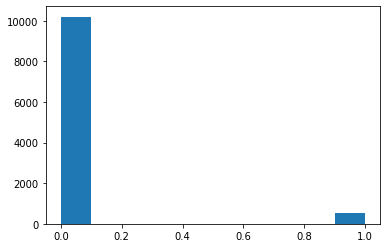

In [929]:
%matplotlib inline
plt.hist(y)

(array([4.071e+03, 2.280e+02, 3.650e+02, 1.012e+03, 3.690e+02, 7.490e+02,
        6.610e+02, 5.840e+02, 7.560e+02, 8.380e+02, 6.440e+02, 1.557e+03,
        5.790e+02, 8.130e+02, 6.030e+02, 2.250e+02, 6.280e+02, 3.010e+02,
        1.500e+02, 4.440e+02, 4.830e+02, 1.340e+02, 2.430e+02, 2.070e+02,
        1.440e+02, 2.120e+02, 8.400e+01, 1.300e+02, 1.900e+01, 4.600e+01,
        3.400e+01, 3.600e+01, 4.700e+01, 3.700e+01, 1.100e+01, 6.300e+01,
        2.000e+01, 5.400e+01, 1.300e+01, 4.600e+01, 1.900e+01, 2.200e+01,
        1.900e+01, 1.150e+02, 0.000e+00, 2.700e+01, 3.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

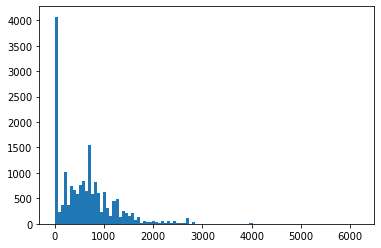

In [930]:
def LEN(a):
    return(len(a))
m=df['Описание компании'].apply(LEN)
plt.hist(m, bins=100)

(array([3.620e+02, 8.830e+02, 1.734e+03, 1.396e+03, 1.705e+03, 1.601e+03,
        1.501e+03, 1.306e+03, 1.387e+03, 9.730e+02, 8.130e+02, 7.390e+02,
        5.870e+02, 4.910e+02, 3.750e+02, 3.530e+02, 3.130e+02, 2.700e+02,
        1.670e+02, 1.450e+02, 1.110e+02, 1.030e+02, 1.040e+02, 6.600e+01,
        7.600e+01, 5.200e+01, 4.500e+01, 2.600e+01, 3.400e+01, 3.100e+01,
        1.600e+01, 1.400e+01, 1.000e+01, 1.000e+01, 5.000e+00, 1.000e+01,
        9.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 1.100e+01, 3.000e+00,
        6.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

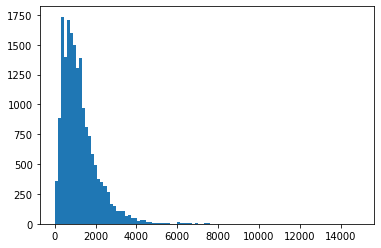

In [931]:
m=df['Описание вакансии'].apply(LEN)
plt.hist(m, bins=100)

(array([3.668e+03, 1.792e+03, 1.371e+03, 1.647e+03, 1.564e+03, 1.435e+03,
        1.349e+03, 9.790e+02, 8.480e+02, 6.610e+02, 5.020e+02, 3.770e+02,
        3.190e+02, 2.490e+02, 1.690e+02, 1.730e+02, 1.220e+02, 9.500e+01,
        6.800e+01, 6.500e+01, 5.600e+01, 3.900e+01, 2.800e+01, 3.300e+01,
        3.200e+01, 2.700e+01, 2.400e+01, 1.400e+01, 1.900e+01, 2.200e+01,
        1.100e+01, 9.000e+00, 1.500e+01, 1.000e+01, 1.600e+01, 2.700e+01,
        4.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 1.200e+01, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

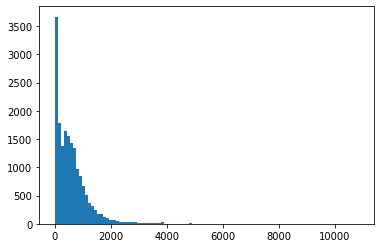

In [932]:
m=df['Требования'].apply(LEN)
plt.hist(m, bins=100)

(array([8.95e+03, 8.93e+02, 8.68e+02, 8.22e+02, 7.66e+02, 7.30e+02,
        5.85e+02, 4.66e+02, 4.14e+02, 3.54e+02, 3.68e+02, 2.78e+02,
        3.13e+02, 1.94e+02, 1.98e+02, 2.47e+02, 1.17e+02, 1.77e+02,
        1.48e+02, 1.06e+02, 1.87e+02, 5.00e+01, 6.20e+01, 5.00e+01,
        1.06e+02, 4.00e+01, 6.20e+01, 3.10e+01, 3.30e+01, 3.30e+01,
        2.80e+01, 1.20e+01, 1.40e+01, 7.00e+00, 1.30e+01, 8.00e+00,
        5.00e+00, 8.00e+00, 8.00e+00, 9.00e+00, 7.00e+00, 6.00e+00,
        7.00e+00, 8.00e+00, 1.50e+01, 2.00e+00, 1.20e+01, 1.00e+00,
        2.60e+01, 5.00e+00, 1.00e+00, 1.00e+00, 5.00e+00, 3.00e+00,
        2.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 4.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 

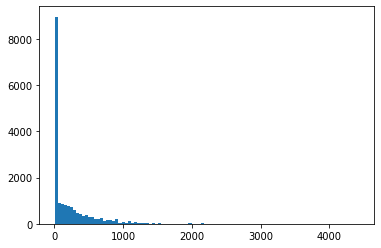

In [933]:
m=df['Соцпакет'].apply(LEN)
plt.hist(m, bins=100)

In [934]:
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,"Reporter, Agri Investor","US, ,",KHR,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,Software Engineer,"US, VA, Herndon",Software Engineering,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,Structural Engineer,"NL, ZH, Rotterdam",onshore,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0,0,0,0,0
3,1916,Senior Publishing Specialist,"US, ,",0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0,0,0,0,0
4,1811,Sales Representative,"CA, BC, Vancouver",Sales & Marketing,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,System Engineer (jr),0,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,0,0,0,0,0
7148,17876,Mirfield Warehousing Apprenticeship Under NAS ...,"GB, , Mirfield",0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,0
7149,17877,Sales Director,"US, PA, Philadelphia",0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,Sales Development Representative,"US, CA, Emeryville",Sales,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


(array([4872., 2348., 1683., 1501., 1431., 1277., 1254., 1190., 1184.,
        1140.]),
 array([    0.,  1123.,  2246.,  3369.,  4492.,  5615.,  6738.,  7861.,
         8984., 10107., 11230.]),
 <a list of 10 Patch objects>)

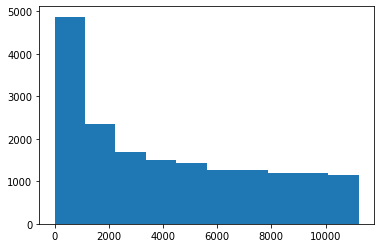

In [935]:
df['Название']=pd.factorize(df['Название'])[0]
plt.hist(df['Название'])

In [936]:
count_name = df.groupby("Название").agg({'Название': 'count'})
count_name[count_name["Название"]>100]

,Название
Название,
29,311
106,144
137,146


In [937]:
def name_count(a):
    if a==29 or a==106 or a==137:
        return(a)
    else:
        return(0)
        
df['Название'] = df['Название'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,"US, ,",KHR,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,0,"US, VA, Herndon",Software Engineering,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,0,"NL, ZH, Rotterdam",onshore,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0,0,0,0,0
3,1916,0,"US, ,",0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0,0,0,0,0
4,1811,0,"CA, BC, Vancouver",Sales & Marketing,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,0,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,0,0,0,0,0
7148,17876,0,"GB, , Mirfield",0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,0
7149,17877,0,"US, PA, Philadelphia",0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,0,"US, CA, Emeryville",Sales,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


(array([3264., 2183., 1382.,  555.,  656.,  786.,  470.,  536.,  393.,
         296.,  293.,  225.,  260.,  271.,  164.,  241.,  213.,  125.,
         149.,  142.,  185.,  156.,  128.,  123.,  153.,   89.,  143.,
          90.,  105.,  130.,  133.,  110.,   81.,   83.,   89.,  118.,
          66.,  113.,   93.,   70.,  107.,   89.,   53.,   94.,   54.,
          67.,   88.,   72.,   67.,   78.,   67.,   49.,   52.,   50.,
          71.,   73.,   57.,   76.,   63.,   53.,   52.,   52.,   64.,
          55.,   50.,   48.,   43.,   51.,   43.,   50.,   43.,   43.,
          46.,   43.,   39.,   40.,   40.,   37.,   39.,   40.,   44.,
          43.,   38.,   36.,   38.,   37.,   38.,   35.,   34.,   39.,
          35.,   39.,   31.,   36.,   31.,   36.,   33.,   33.,   32.,
          32.]),
 array([   0.  ,   31.05,   62.1 ,   93.15,  124.2 ,  155.25,  186.3 ,
         217.35,  248.4 ,  279.45,  310.5 ,  341.55,  372.6 ,  403.65,
         434.7 ,  465.75,  496.8 ,  527.85,  558.9 ,  589.95

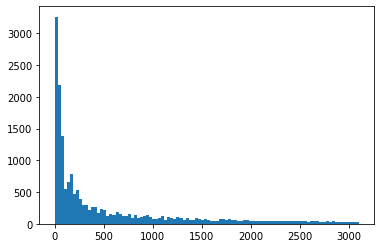

In [938]:
df['Место']=pd.factorize(df['Место'])[0]
plt.hist(df['Место'], bins=100)

In [939]:
count_name = df.groupby("Место").agg({'Место': 'count'})
count_name[count_name["Место"]>300]

,Место
Место,
0,339
27,718
28,472
42,346
57,658
92,464


In [940]:
def name_count(a):
    if a==0 or a==27 or a==28 or a==42 or a==57 or a==92:
        return(a)
    else:
        return(0)
        
df['Место'] = df['Место'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,0,KHR,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,0,0,Software Engineering,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,0,0,onshore,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0,0,0,0,0
3,1916,0,0,0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0,0,0,0,0
4,1811,0,0,Sales & Marketing,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,42,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,0,0,0,0,0
7148,17876,0,0,0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,0
7149,17877,0,0,0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,0,0,Sales,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


(array([12592.,  1036.,   723.,   236.,   185.,   162.,    53.,   103.,
           91.,    98.,    42.,    84.,    80.,    65.,    61.,    95.,
           57.,    56.,    33.,    72.,    51.,   128.,    35.,    34.,
           43.,    29.,    42.,    40.,    49.,    55.,    34.,    26.,
           44.,    44.,    30.,    35.,    28.,    29.,    29.,    25.,
           21.,    27.,    28.,    27.,    29.,    32.,    29.,    24.,
           22.,    34.,    19.,    26.,    23.,    26.,    19.,    19.,
           17.,    18.,    23.,    24.,    23.,    19.,    20.,    19.,
           15.,    17.,    21.,    21.,    19.,    22.,    17.,    14.,
           18.,    19.,    15.,    18.,    15.,    15.,    14.,    14.,
           15.,    15.,    14.,    14.,    13.,    14.,    14.,    13.,
           15.,    16.,    14.,    14.,    13.,    14.,    16.,    14.,
           14.,    15.,    13.,    14.]),
 array([   0.  ,   13.36,   26.72,   40.08,   53.44,   66.8 ,   80.16,
          93.52,  106.8

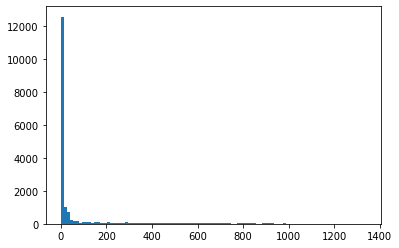

In [941]:
df['Отдел']=pd.factorize(df['Отдел'])[0]
plt.hist(df['Отдел'], bins=100)

In [942]:
count_name = df.groupby("Отдел").agg({'Отдел': 'count'})
count_name[count_name["Отдел"]>300]

,Отдел
Отдел,
3,11548
6,551
21,487
31,401


In [943]:
def name_count(a):
    if a==3 or a==6 or a==21 or a==31:
        return(a)
    else:
        return(0)
        
df['Отдел'] = df['Отдел'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,0,0,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,Full-time,Associate,Bachelor's Degree,Publishing,Writing/Editing
1,8219,0,0,0,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,Full-time,Not Applicable,Unspecified,Computer Software,Engineering
2,5342,0,0,0,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0,0,0,0,0
3,1916,0,0,3,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0,0,0,0,0
4,1811,0,0,0,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,42,3,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,0,0,0,0,0
7148,17876,0,0,3,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,Full-time,Not Applicable,High School or equivalent,Warehousing,0
7149,17877,0,0,3,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales
7150,17878,0,0,6,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Sales


(array([11620.,     0.,     0.,     0.,  3471.,     0.,     0.,     0.,
          797.,     0.,     0.,     0.,  1524.,     0.,     0.,     0.,
          227.,     0.,     0.,   241.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

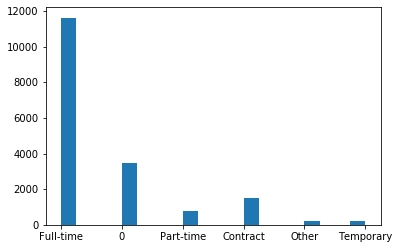

In [944]:

plt.hist(df['Тип занятости'], bins=20)

In [945]:
df['Тип занятости']=pd.factorize(df['Тип занятости'])[0]

(array([2297.,    0.,    0.,    0., 1116.,    0.,    0.,    0., 7050.,
           0.,    0.,    0., 2697.,    0.,    0.,    0.,    0., 3809.,
           0.,    0.,    0.,  381.,    0.,    0.,    0.,  389.,    0.,
           0.,    0.,  141.]),
 array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
        1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
        2.33333333, 2.56666667, 2.8       , 3.03333333, 3.26666667,
        3.5       , 3.73333333, 3.96666667, 4.2       , 4.43333333,
        4.66666667, 4.9       , 5.13333333, 5.36666667, 5.6       ,
        5.83333333, 6.06666667, 6.3       , 6.53333333, 6.76666667,
        7.        ]),
 <a list of 30 Patch objects>)

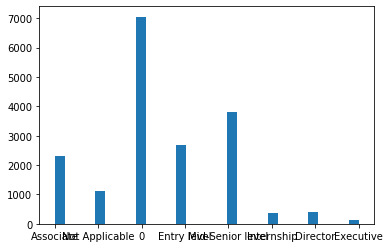

In [946]:
plt.hist(df['Опыт'], bins=30)

In [947]:
df['Опыт']=pd.factorize(df['Опыт'])[0]

(array([5.145e+03, 1.397e+03, 0.000e+00, 8.105e+03, 2.080e+03, 0.000e+00,
        4.160e+02, 2.740e+02, 0.000e+00, 1.020e+02, 1.700e+02, 0.000e+00,
        4.900e+01, 2.600e+01, 0.000e+00, 7.400e+01, 2.700e+01, 0.000e+00,
        9.000e+00, 6.000e+00]),
 array([ 0.  ,  0.65,  1.3 ,  1.95,  2.6 ,  3.25,  3.9 ,  4.55,  5.2 ,
         5.85,  6.5 ,  7.15,  7.8 ,  8.45,  9.1 ,  9.75, 10.4 , 11.05,
        11.7 , 12.35, 13.  ]),
 <a list of 20 Patch objects>)

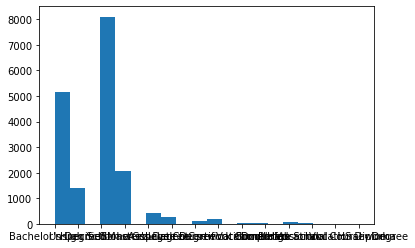

In [948]:
plt.hist(df['Образование'], bins=20)

In [949]:
df['Образование']=pd.factorize(df['Образование'])[0]
count_name = df.groupby("Образование").agg({'Образование': 'count'})
count_name[count_name["Образование"]>1000]

,Образование
Образование,
0,5145
1,1397
2,8105
3,2080


In [950]:
def name_count(a):
    if a==0 or a==1 or a==2 or a==3:
        return(a)
    else:
        return(4)
        
df['Отдел'] = df['Отдел'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,0,0,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,0,0,0,Publishing,Writing/Editing
1,8219,0,0,0,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,0,1,1,Computer Software,Engineering
2,5342,0,0,0,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,1,2,2,0,0
3,1916,0,0,3,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,1,2,2,0,0
4,1811,0,0,0,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,42,3,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,1,2,2,0,0
7148,17876,0,0,3,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,0,1,3,Warehousing,0
7149,17877,0,0,3,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,0,6,5,Information Technology and Services,Sales
7150,17878,0,0,4,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,0,3,0,Computer Software,Sales


(array([7608., 2279., 2498., 1965.,  422.,  665.,  396.,  304.,  392.,
         304.,  165.,  165.,  125.,  192.,  195.,   55.,   54.,   34.,
          52.,   10.]),
 array([  0.  ,   6.55,  13.1 ,  19.65,  26.2 ,  32.75,  39.3 ,  45.85,
         52.4 ,  58.95,  65.5 ,  72.05,  78.6 ,  85.15,  91.7 ,  98.25,
        104.8 , 111.35, 117.9 , 124.45, 131.  ]),
 <a list of 20 Patch objects>)

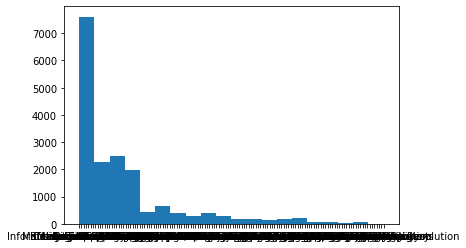

In [951]:
plt.hist(df['Индустрия'], bins=20)

In [952]:
df['Индустрия']=pd.factorize(df['Индустрия'])[0]
count_name = df.groupby("Индустрия").agg({'Индустрия': 'count'})
count_name[count_name["Индустрия"]>1000]

,Индустрия
Индустрия,
1,1376
2,4903
9,1734
17,1062


In [953]:
def name_count(a):
    if a==1 or a==2 or a==9 or a==17:
        return(a)
    else:
        return(0)
        
df['Отдел'] = df['Отдел'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,0,0,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,0,0,0,0,Writing/Editing
1,8219,0,0,0,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,0,1,1,1,Engineering
2,5342,0,0,0,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,1,2,2,2,0
3,1916,0,0,0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,1,2,2,2,0
4,1811,0,0,0,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,42,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,1,2,2,2,0
7148,17876,0,0,0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,0,1,3,59,0
7149,17877,0,0,0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,0,6,5,9,Sales
7150,17878,0,0,0,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,0,3,0,1,Sales


(array([1480., 7684., 2074., 2298.,  666.,  286.,  172.,  201.,  449.,
         228.,  523.,  566.,  530.,   33.,  192.,  196.,   29.,   97.,
         106.,   70.]),
 array([ 0.  ,  1.85,  3.7 ,  5.55,  7.4 ,  9.25, 11.1 , 12.95, 14.8 ,
        16.65, 18.5 , 20.35, 22.2 , 24.05, 25.9 , 27.75, 29.6 , 31.45,
        33.3 , 35.15, 37.  ]),
 <a list of 20 Patch objects>)

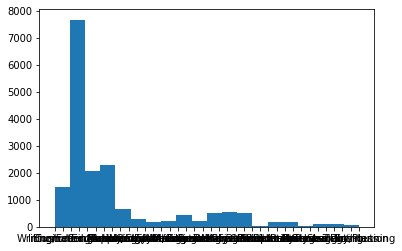

In [954]:
plt.hist(df['Позиция'], bins=20)

In [955]:
df['Позиция']=pd.factorize(df['Позиция'])[0]
count_name = df.groupby("Позиция").agg({'Позиция': 'count'})
count_name[count_name["Позиция"]>1000]

,Позиция
Позиция,
1,1348
2,6455
3,1229
4,1749
6,1468


In [956]:
def name_count(a):
    if a==1 or a==2 or a==3 or a==4 or a==6:
        return(a)
    else:
        return(0)
        
df['Позиция'] = df['Позиция'].apply(name_count)
df

,Id,Название,Место,Отдел,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,0,0,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,0,0,0,0,0
1,8219,0,0,0,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,0,1,1,1,1
2,5342,0,0,0,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,1,2,2,2,2
3,1916,0,0,0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,1,2,2,2,2
4,1811,0,0,0,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,17875,0,42,0,-1,Massive Media is the social media company behi...,FunctionThe IT Services-department serves our ...,0,0,0,1,1,2,2,2,2
7148,17876,0,0,0,-1,Established on the principles that full time e...,Government funding is only available for 16-1...,16-18 year olds only due to government funding...,Career prospects.,0,1,0,1,3,59,2
7149,17877,0,0,0,-1,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,0,6,5,9,6
7150,17878,0,0,0,-1,Abakus is a software platform built on game th...,Abakus is a software platform built on game th...,&lt;1 year prior Sales Development experience ...,Competitive salaryGenerous bonus/commission ba...,0,0,0,3,0,1,6


In [957]:
stop_words = stopwords.words('english')


In [967]:
def vectorize(text):
    vec = TfidfVectorizer(ngram_range=(1, 3),stop_words=stop_words, min_df=0.002)
    bow_train = vec.fit_transform(text)
    
    return bow_train


In [968]:
df_description_company = vectorize(df['Описание компании'])

In [969]:
df_description_vacan = vectorize(df['Описание вакансии'])

In [970]:
df_demand = vectorize(df['Требования'])

In [971]:
df_soc = vectorize(df['Соцпакет'])

In [972]:
df_description_vacan

<17880x10943 sparse matrix of type '<class 'numpy.float64'>'
	with 1913316 stored elements in Compressed Sparse Row format>

In [973]:
df_soc=df_soc.toarray()
df_description_company=df_description_company.toarray()
df_description_vacan=df_description_vacan.toarray()
df_demand =df_demand.toarray()


In [974]:
def cut(df):
    
    return(df[:10728],df[10728:])

In [975]:
train_soc,test_soc =cut(df_soc)
x_train, x_test, y_train, y_test = train_test_split(train_soc, y,random_state=42)

In [976]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f1_score(pred, y_test))

0.28965517241379307


In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(f1_score(pred, y_test))

In [349]:
clf = AdaBoostClassifier(random_state=42)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f1_score(pred, y_test))

0.42168674698795183


In [982]:
%%time
model_1 = lgb.LGBMClassifier(num_leaves=18, random_state= 27,
                          max_depth =5, learning_rate=0.1,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary',
                             #reg_alpha= 0.001,
                          # reg_lambda=0.001
                          )
model_1.fit(x_train, y_train)
pred = model_1.predict(x_train)
print(f1_score(pred, y_train))#0.51485

0.7165605095541402
Wall time: 3.02 s


In [53]:
trees =  GradientBoostingClassifier(random_state=42)
trees.fit(x_train, y_train)
pred = trees.predict(x_test)
print(f1_score(pred, y_test))

0.48275862068965514


In [983]:
train_description_company,test_description_company =cut(df_description_company)
x_train, x_test, y_train, y_test = train_test_split(train_description_company, y,random_state=42)

In [984]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f1_score(pred, y_test))

0.38961038961038963


In [56]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(f1_score(pred, y_test))

0.5294117647058824


In [987]:
%%time
model_2 = lgb.LGBMClassifier(num_leaves=18, random_state= 27,
                          max_depth =3, learning_rate=0.1,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary',#reg_alpha= 0.00914,
                         #  reg_lambda=0.019
                          )
model_2.fit(x_train, y_train)
pred = model_2.predict(x_train)
print(f1_score(pred, y_train))#0.446927374301676

0.4653846153846154
Wall time: 7 s


In [988]:
train_description_vacan,test_description_vacan =cut(df_description_vacan)
x_train, x_test, y_train, y_test = train_test_split(train_description_vacan, y,random_state=42)

In [989]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f1_score(pred, y_test))

0.3576158940397351


In [60]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(f1_score(pred, y_test))

0.641304347826087


In [994]:
%%time
model_3 = lgb.LGBMClassifier(num_leaves=18, random_state= 27,
                          max_depth =15, learning_rate=0.03,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary',#reg_alpha= 0.0001,
                           #reg_lambda=0.0001
                          )
model_3.fit(x_train, y_train)
pred = model_3.predict(x_test)
print(f1_score(pred, y_test))#0.695238

0.7100000000000001
Wall time: 21.1 s


In [995]:
train_demand,test_demand =cut(df_demand)
x_train, x_test, y_train, y_test = train_test_split(train_demand, y,random_state=42)

In [996]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f1_score(pred, y_test))

0.31999999999999995


In [999]:
%%time
model_4 = lgb.LGBMClassifier(num_leaves=18, random_state= 27,
                          max_depth =3, learning_rate=0.1,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary'#,reg_alpha= 0.0015,
                         #  reg_lambda=0.001
                          )
model_4.fit(x_train, y_train)
pred = model_4.predict(x_test)
print(f1_score(pred, y_test))#0.5951

0.5913978494623656
Wall time: 4.17 s


In [1001]:
train, test = cut(df)

In [1002]:
#
train = train.drop(['Название','Отдел'],axis=1)
test = test.drop(['Название','Отдел'],axis=1)

In [1003]:
train

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,0,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,0,0,0,0,0
1,8219,0,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,0,1,1,1,1
2,5342,0,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,1,2,2,2,2
3,1916,0,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,1,2,2,2,2
4,1811,0,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,0,-1,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,3,2,0,14,2
10724,15218,28,65000-90000,Addy's mission is to make every delivery effic...,Here at Addy we are building the easiest way f...,The ideal candidate would possess strong inter...,Employee stock optionsComprehensive health ins...,0,0,0,1,0,17,6
10725,3755,0,32000-34000,"With over 1,300 investment professionals locat...","Marcus &amp; Millichap, the nation's leading c...",Required Knowledge and/or Experience• Strong k...,0,0,0,0,2,3,31,0
10726,7913,0,-1,"For more than two decades, the TRAK Companies ...",TRAK Services is currently recruiting for a co...,Bachelor’s DegreeDetail orientedSuperb organiz...,0,0,1,1,2,2,2,2


In [1004]:
def normalaze(X):
    return(preprocessing.scale(np.array(X).reshape(-1,1)))
train['Место'] = normalaze(train['Место'])    

In [1005]:
train['Тип занятости'] = normalaze(train['Тип занятости'])    

In [1006]:
train['Образование'] = normalaze(train['Образование'])    

In [1007]:
train['Индустрия'] = normalaze(train['Индустрия'])    

In [1008]:
train['Позиция'] = normalaze(train['Позиция'])  
train['Опыт'] = normalaze(train['Опыт']) 

In [1009]:
test['Тип занятости'] = normalaze(test['Тип занятости'])  
test['Образование'] = normalaze(test['Образование'])    
test['Индустрия'] = normalaze(test['Индустрия'])    
test['Позиция'] = normalaze(test['Позиция'])  
test['Место'] = normalaze(test['Место']) 
test['Опыт'] = normalaze(test['Опыт'])

In [1010]:
train[train['Зарплата']=='0']

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция


In [1011]:
train

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,-0.369032,-1,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Seeking savvy business reporter Are you a news...,The successful candidate should have a bachelo...,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,8219,-0.369032,-1,Roka Security is a boutique security firm that...,Roka Security is looking for Software Engineer...,0,0,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,5342,-0.369032,-1,0,Job tasks:Analyse project specifications on st...,Job requirements:HTS/TU Civil Engineering or M...,0,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,1916,-0.369032,-1,0,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,0,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,1811,-0.369032,-1,0,BCCC Enterprises provides management consultin...,Key Responsibilities:Contribute to the financi...,How to ApplyThis is an exciting opportunity. ...,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,-0.369032,-1,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,15218,1.076848,65000-90000,Addy's mission is to make every delivery effic...,Here at Addy we are building the easiest way f...,The ideal candidate would possess strong inter...,Employee stock optionsComprehensive health ins...,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,3755,-0.369032,32000-34000,"With over 1,300 investment professionals locat...","Marcus &amp; Millichap, the nation's leading c...",Required Knowledge and/or Experience• Strong k...,0,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,7913,-0.369032,-1,"For more than two decades, the TRAK Companies ...",TRAK Services is currently recruiting for a co...,Bachelor’s DegreeDetail orientedSuperb organiz...,0,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1012]:
train['Соцпакет']=model_1.predict_proba(train_soc)

In [1013]:
train['Описание компании']=model_2.predict_proba(train_description_company)

In [1014]:
train['Описание вакансии']=model_3.predict_proba(train_description_vacan)

In [1015]:
train['Требования']=model_4.predict_proba(train_demand)

In [1016]:

test['Соцпакет']=model_1.predict_proba(test_soc)
test['Описание компании']=model_2.predict_proba(test_description_company)  
test['Описание вакансии']=model_3.predict_proba(test_description_vacan)
test['Требования']=model_4.predict_proba(test_demand)

#test = test.drop(['Зарплата'],axis=1)
test = test.drop(['Id'],axis=1)

In [1017]:
test['Описание компании'] = normalaze(test['Описание компании'])  
test['Описание вакансии'] = normalaze(test['Описание вакансии'])    
test['Требования'] = normalaze(test['Требования'])    
test['Соцпакет'] = normalaze(test['Соцпакет'])  

train['Описание компании'] = normalaze(train['Описание компании'])  
train['Описание вакансии'] = normalaze(train['Описание вакансии'])    
train['Требования'] = normalaze(train['Требования'])    
train['Соцпакет'] = normalaze(train['Соцпакет'])  


In [1018]:
train

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,-0.369032,-1,0.362388,0.220566,0.271878,0.310388,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,8219,-0.369032,-1,0.361796,0.220225,-0.073768,-0.014091,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,5342,-0.369032,-1,-0.916482,0.218948,0.046912,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,1916,-0.369032,-1,-0.916482,0.065382,0.254892,-0.014091,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,1811,-0.369032,-1,-0.916482,0.221118,0.276045,0.300346,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,-0.369032,-1,0.362516,0.221337,0.273029,0.310899,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,15218,1.076848,65000-90000,0.363932,0.220024,0.260047,0.311680,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,3755,-0.369032,32000-34000,0.364603,0.219105,0.082444,-0.014091,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,7913,-0.369032,-1,0.363954,0.217399,0.228122,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1019]:
def zp(a):
    if a=='-1':
        return(-1)
    elif a==0:
        return (0)
    else:
        return(1)
        
train['Зарплата'] = train['Зарплата'].apply(zp)
test['Зарплата'] = test['Зарплата'].apply(zp)
train

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,-0.369032,-1,0.362388,0.220566,0.271878,0.310388,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,8219,-0.369032,-1,0.361796,0.220225,-0.073768,-0.014091,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,5342,-0.369032,-1,-0.916482,0.218948,0.046912,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,1916,-0.369032,-1,-0.916482,0.065382,0.254892,-0.014091,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,1811,-0.369032,-1,-0.916482,0.221118,0.276045,0.300346,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,-0.369032,-1,0.362516,0.221337,0.273029,0.310899,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,15218,1.076848,1,0.363932,0.220024,0.260047,0.311680,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,3755,-0.369032,1,0.364603,0.219105,0.082444,-0.014091,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,7913,-0.369032,-1,0.363954,0.217399,0.228122,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1020]:
train

,Id,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,10497,-0.369032,-1,0.362388,0.220566,0.271878,0.310388,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,8219,-0.369032,-1,0.361796,0.220225,-0.073768,-0.014091,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,5342,-0.369032,-1,-0.916482,0.218948,0.046912,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,1916,-0.369032,-1,-0.916482,0.065382,0.254892,-0.014091,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,1811,-0.369032,-1,-0.916482,0.221118,0.276045,0.300346,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,15315,-0.369032,-1,0.362516,0.221337,0.273029,0.310899,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,15218,1.076848,1,0.363932,0.220024,0.260047,0.311680,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,3755,-0.369032,1,0.364603,0.219105,0.082444,-0.014091,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,7913,-0.369032,-1,0.363954,0.217399,0.228122,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1021]:
train =train.drop(['Id'], axis=1)
train

,Место,Зарплата,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,-0.369032,-1,0.362388,0.220566,0.271878,0.310388,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,-0.369032,-1,0.361796,0.220225,-0.073768,-0.014091,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,-0.369032,-1,-0.916482,0.218948,0.046912,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,-0.369032,-1,-0.916482,0.065382,0.254892,-0.014091,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,-0.369032,-1,-0.916482,0.221118,0.276045,0.300346,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,-1,0.362516,0.221337,0.273029,0.310899,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,1.076848,1,0.363932,0.220024,0.260047,0.311680,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,-0.369032,1,0.364603,0.219105,0.082444,-0.014091,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,-0.369032,-1,0.363954,0.217399,0.228122,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1022]:
#train['text']=normalaze(train['text'])

In [1023]:
train= train.drop(['Зарплата'], axis=1)
test= test.drop(['Зарплата'], axis=1)

In [1024]:
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=27)

In [1025]:
model = lgb.LGBMClassifier(num_leaves=15, random_state= 27,
                          max_depth =3, learning_rate=0.01,
                           n_estimators =1500, subsample_for_bin=2000,
                           objective='binary',reg_alpha= 0.001,
                           reg_lambda=0.5
                          )
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(pred, y_test))#0.9910714285714286

0.9910714285714286


In [1030]:
model_0 =  lgb.LGBMClassifier(num_leaves=15, random_state= 27,
                          max_depth =15, learning_rate=0.1,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary',reg_alpha= 0.001,
                           reg_lambda=0.005
                          )
model_0.fit(train, y)
pred = model.predict(train)
print(f1_score(pred, y))

0.974757281553398


In [1031]:
train

,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,-0.369032,0.362388,0.220566,0.271878,0.310388,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,-0.369032,0.361796,0.220225,-0.073768,-0.014091,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,-0.369032,-0.916482,0.218948,0.046912,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,-0.369032,-0.916482,0.065382,0.254892,-0.014091,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,-0.369032,-0.916482,0.221118,0.276045,0.300346,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,0.362516,0.221337,0.273029,0.310899,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,1.076848,0.363932,0.220024,0.260047,0.311680,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,-0.369032,0.364603,0.219105,0.082444,-0.014091,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,-0.369032,0.363954,0.217399,0.228122,-0.014091,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [1032]:
test

,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,-0.368756,-0.961997,0.192248,0.276226,0.313362,0,0,0.316991,-0.300538,0.178052,-0.697205,0.074371
1,-0.368756,0.337838,0.192317,-0.176646,-0.086359,0,1,0.316991,-0.300538,0.178052,-0.697205,0.074371
2,-0.368756,0.353222,0.189072,0.240717,-0.086359,0,1,1.212024,-0.300538,2.071156,0.352336,-1.060963
3,-0.368756,0.353272,0.191926,0.270176,0.319128,0,1,0.316991,-0.977955,0.178052,0.226391,0.074371
4,-0.368756,0.351886,0.191203,0.270048,0.319008,0,0,0.316991,-0.300538,0.178052,-0.697205,0.074371
...,...,...,...,...,...,...,...,...,...,...,...,...
7147,1.817707,0.352748,0.188006,-0.176646,-0.086359,0,1,0.316991,-0.300538,0.178052,-0.697205,0.074371
7148,-0.368756,0.353316,0.192377,0.263580,0.305966,0,1,-0.578042,-0.977955,0.809087,1.695748,0.074371
7149,-0.368756,0.353337,0.192306,0.276154,0.319089,1,1,-0.578042,2.409132,2.071156,-0.403334,2.345039
7150,-0.368756,0.353353,0.192403,0.261209,0.319103,0,0,-0.578042,0.376880,-1.084018,-0.739187,2.345039


In [1040]:
pred = model.predict(test)

In [1036]:
pred = model_0.predict(test)

In [1041]:
pred.sum()

320

In [18]:
!pip install bert-for-tf2

In [19]:
!pip install --upgrade tensorflow_hub

Requirement already up-to-date: tensorflow_hub in c:\users\kostja\anaconda3\lib\site-packages (0.9.0)


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import tensorflow_hub as hub


import tensorflow as tf

#import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [21]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
# module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
#https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1
#https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/1
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [22]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
vocab_file =  bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case =  bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)

In [23]:
def bert_encode(texts, tokenizer, max_len=50):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [24]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [25]:
df.isnull().sum()

Id                   0
Название             0
Место                0
Отдел                0
Зарплата             0
Описание компании    0
Описание вакансии    0
Требования           0
Соцпакет             0
Дистанционно         0
Вопросы              0
Тип занятости        0
Опыт                 0
Образование          0
Индустрия            0
Позиция              0
dtype: int64

In [ ]:
def tokeniz(text:str):
    tokens = nltk.word_tokenize(text)

    srt_format= [i.lower() for i in tokens if (i  not in string.punctuation) ]
    
    srt_format =' '.join(srt_format)
    return srt_format
# последовательность индексов в текст

m =df['Описание компании'].apply(tokeniz)
m_train, m_test=cut(m)

In [ ]:
m_train, m_test=cut(m)
full_input = bert_encode(m_train.values, tokenizer, max_len=50)
full_labels = y

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(m_train, y, test_size=0.15, random_state=10)
train_input = bert_encode(train_data, tokenizer, max_len=50)
val_input = bert_encode(val_data, tokenizer, max_len=50)
test_input = bert_encode(m_test, tokenizer, max_len=50)

In [ ]:
learning_rate=1e-5
decay=5e-5
max_len=50
# lr_schedule = [5e-8,1e-8,5e-9,1e-9]
# lr_schedule = [1e-6, 5e-7, 1e-7, 5e-8, 1e-8, 1e-9]
lr_schedule = [9e-7,1e-8,5e-8,9e-8,7e-9,1e-9]
K.clear_session()

In [ ]:
input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
clf_output = sequence_output[:, 0, :]
# clf_pooled = pooled_output[:, 0, :]

## Type1
# out = Dense(100, activation='relu', activity_regularizer=regularizers.l2(9e-5))(clf_output)
# out = Dense(100, activation='relu', activity_regularizer=regularizers.l2(9e-5))(out)
# out = Dense(100, activation='relu')(out)

## Type2
# out = Dropout(Dropout_num)(clf_output)
out = Dense(512, activation='relu', activity_regularizer=regularizers.l2(1e-5))(clf_output)
out = Dense(256, activation='relu', activity_regularizer=regularizers.l2(1e-5))(out)
out = Dense(256, activation='relu', activity_regularizer=regularizers.l2(1e-5))(out)

## Type3
# out = clf_output


out = Dense(1, activation='sigmoid')(out)


## Type4
# out = clf_output

In [ ]:
sBERT = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
# sBERT.compile(SGD(lr=learning_rate, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
for layer in sBERT.layers[:4]:
    layer.trainable=False
for layer in sBERT.layers[4:]:
    layer.trainable=True
sBERT.compile(Adam(lr=learning_rate, decay=decay), loss='binary_crossentropy', metrics=['accuracy',f1_m])
sBERT.summary()

In [ ]:
K.set_value(sBERT.optimizer.lr, 1e-7)
sBERT.fit(
    full_input, full_labels,
    epochs = 1,
    batch_size = 16
)
test_pred = sBERT.predict(test_input)
epoch_test_accuracy = f1_score(test_labels,test_pred.round())
print(" - test_f1_score: {}".format(epoch_test_accuracy))
print()

if epoch_test_accuracy >= test_accuracy:
    sBERT.save('best_accuracy.h5')
    test_accuracy = epoch_test_accuracy

In [1042]:
def write_to_submission_file(predictions, index = list(range(1,7153)) , out_file='Submission.csv', columns=['Id', 'Фейк']):
    predicted_df=pd.DataFrame([])
    predicted_df['Id'] = index
    predicted_df['Фейк'] = predictions
    predicted_df.columns = columns
    predicted_df['Id'] = predicted_df['Id'].astype('int64')+10727
    predicted_df.to_csv('Submission.csv', index=False)
    print(predicted_df)

write_to_submission_file(pred)


         Id  Фейк
0     10728     0
1     10729     0
2     10730     0
3     10731     0
4     10732     0
...     ...   ...
7147  17875     0
7148  17876     0
7149  17877     0
7150  17878     0
7151  17879     0

[7152 rows x 2 columns]


In [743]:
import string 
def tokeniz(text:str):
    tokens = nltk.word_tokenize(text)
    srt_format= [i.lower() for i in tokens if (i  not in string.punctuation) ]

    str_format=[i for i in srt_format if (i not in stop_words)]
    return str_format
# последовательность индексов в текст

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# текст в последовательность индексов

def encode_review(text):
    words = text
    words = ['<START>'] + words
    idxs = [word_index.get(word, word_index['<UNKNOWN>']) for word in words]
    return idxs
def preposing(df, column):
    tokens=df[column].apply(tokeniz)
    df = df.assign(tokens=tokens)
    df
    df.reset_index(drop=True, inplace=True)
    k =set()
    words = dict()
    for text in df.tokens:
        vocab =k.update(set(text))

    word = list(k)
    word_index = {k: v+3 for v,k in enumerate(word)} 
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNKNOWN>"] = 2

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

    tokens_encode=df.tokens.apply(encode_review)
    df = df.assign(tokens_encode=tokens_encode)
    MAX_SEQ_LEN = 128 # Финальная длина последовательности

    data = tf.keras.preprocessing.sequence.pad_sequences(
    df.tokens_encode,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)
    x,y =cut(data)
    return(x,y ,(len(k)+3))



In [733]:
train_data,test_data,VOCAB_SIZE  =preposing(df,'Описание компании')

In [705]:
x_train, x_test, y_train, y_test = train_test_split(train_data, y, random_state=27)

In [707]:
class WeightedBinaryCrossEntropy(tf.keras.losses.Loss):
    """
    Args:
      pos_weight: Скалярный вес для положительных меток функции потерь.
      weight: Скалярный вес для всей функции потерь.
      from_logits: Вычислять ли потери от логитов или вероятностей.
      reduction: Тип tf.keras.losses.Reduction для применения к функции потерь.
      name: Имя функции потерь.
    """
    def __init__(self, pos_weight, weight, from_logits=False,
                 reduction=tf.keras.losses.Reduction.AUTO,
                 name='weighted_binary_crossentropy'):
        super(WeightedBinaryCrossEntropy, self).__init__(reduction=reduction,
                                                         name=name)
        self.pos_weight = pos_weight
        self.weight = weight
        self.from_logits = from_logits

    def call(self, y_true, y_pred):
        if not self.from_logits:
            # Вручную посчитаем взвешенную кросс-энтропию.
            # Формула следующая qz * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
            # где z - метки, x - логиты, а q - веса.
            # Поскольку переданные значения от сигмоиды (предположим в этом случае)
            # sigmoid(x) будет заменено на y_pred

            # qz * -log(sigmoid(x)) 1e-6 добавляется как эпсилон, чтобы не передать нуль в логарифм
            x_1 = y_true * self.pos_weight * -tf.math.log(y_pred + 1e-6)

            # (1 - z) * -log(1 - sigmoid(x)). Добавляем эпсилон, чтобы не пропустить нуль в логарифм
            x_2 = (1 - y_true) * -tf.math.log(1 - y_pred + 1e-6)

            return tf.add(x_1, x_2) * self.weight 

        # Используем встроенную функцию
        return tf.nn.weighted_cross_entropy_with_logits(y_true, y_pred, self.pos_weight) * self.weight




In [708]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 48),
    tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(32, return_sequences=True,dropout=0.3, recurrent_dropout=0.2,)),
    tf.keras.layers.LSTM(32, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),

    tf.keras.layers.LSTM(32, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),

    tf.keras.layers.LSTM(16, return_sequences=False, dropout=0.4, recurrent_dropout=0.2,),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [709]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=WeightedBinaryCrossEntropy(20,1), metrics=tf.keras.metrics.AUC())

In [710]:
batch_size=300


In [711]:
x_train =x_train.astype(float)

In [712]:
y_train = y_train.astype(float)
tf.config.run_functions_eagerly(True)

In [713]:
history = model.fit(x_train,
                    y_train ,
                    epochs=10,
                #    validation_data=(x_val,y_val),
                    batch_size=batch_size,
                    validation_split =0.3
                    )

Epoch 1/10
19/19 [==============================] - 99s 5s/step - loss: 1.3864 - auc_2: 0.5252 - val_loss: 1.3059 - val_auc_2: 0.5902
Epoch 2/10
19/19 [==============================] - 97s 5s/step - loss: 1.3869 - auc_2: 0.5146 - val_loss: 1.2907 - val_auc_2: 0.5902
Epoch 3/10
19/19 [==============================] - 101s 5s/step - loss: 1.3611 - auc_2: 0.5617 - val_loss: 1.2175 - val_auc_2: 0.6994
Epoch 4/10
19/19 [==============================] - 102s 5s/step - loss: 1.2200 - auc_2: 0.6915 - val_loss: 1.0027 - val_auc_2: 0.8034
Epoch 5/10
19/19 [==============================] - 97s 5s/step - loss: 1.1020 - auc_2: 0.7667 - val_loss: 0.8255 - val_auc_2: 0.8371
Epoch 6/10
19/19 [==============================] - 97s 5s/step - loss: 0.8778 - auc_2: 0.8503 - val_loss: 0.7289 - val_auc_2: 0.8767
Epoch 7/10
19/19 [==============================] - 97s 5s/step - loss: 0.7037 - auc_2: 0.8932 - val_loss: 0.6438 - val_auc_2: 0.8903
Epoch 8/10
19/19 [==============================] - 97s 5s/s

In [714]:
y_pred = model.predict(x_train)
y_pred = np.around(y_pred).reshape(-1,1)

In [715]:
f1_score(y_train, y_pred)

0.3772175536881419

In [716]:
train

,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция
0,-0.369032,0.350860,0.230069,0.248796,0.312122,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630
1,-0.369032,0.359481,0.222191,-0.078300,-0.018879,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844
2,-0.369032,-0.902741,0.227816,0.248823,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
3,-0.369032,-0.902741,-0.001819,0.248819,-0.018879,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942
4,-0.369032,-0.902741,0.226289,0.248834,0.307288,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,0.363416,0.230030,0.248828,0.310627,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942
10724,1.076848,0.362489,0.216857,0.248828,0.312136,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087
10725,-0.369032,0.363885,0.204263,0.248278,-0.018879,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630
10726,-0.369032,0.364727,0.222389,0.246173,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942


In [717]:
train_data = train_data.astype(float)
test_data = test_data.astype(float)

In [722]:
y_pred = model.predict_proba(data)
y_pred = np.around(y_pred).reshape(-1,1)



Instructions for updating:
Please use `model.predict()` instead.


C:\Users\KOSTJA\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [723]:
train['lstm_1'] ,test['lstm_1']=  cut(y_pred)

In [724]:
train

,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция,lstm_1
0,-0.369032,0.350860,0.230069,0.248796,0.312122,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630,0.0
1,-0.369032,0.359481,0.222191,-0.078300,-0.018879,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844,0.0
2,-0.369032,-0.902741,0.227816,0.248823,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0
3,-0.369032,-0.902741,-0.001819,0.248819,-0.018879,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0
4,-0.369032,-0.902741,0.226289,0.248834,0.307288,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,0.363416,0.230030,0.248828,0.310627,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942,0.0
10724,1.076848,0.362489,0.216857,0.248828,0.312136,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087,0.0
10725,-0.369032,0.363885,0.204263,0.248278,-0.018879,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630,0.0
10726,-0.369032,0.364727,0.222389,0.246173,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,0.0


In [744]:
train_data,test_data,VOCAB_SIZE  =preposing(df,'Описание вакансии')
x_train, x_test, y_train, y_test = train_test_split(train_data, y, random_state=27)

In [803]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),

    tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.2, 
                         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=2e-3),
                         bias_regularizer=tf.keras.regularizers.l2(1e-4),
                         activity_regularizer=tf.keras.regularizers.l2(5e-3)),
    tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.4, recurrent_dropout=0.2, 
                         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=2e-4),
                         bias_regularizer=tf.keras.regularizers.l2(1e-4),
                         activity_regularizer=tf.keras.regularizers.l2(5e-3)),

    
    tf.keras.layers.LSTM(24, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),
    tf.keras.layers.LSTM(16, return_sequences=False, dropout=0.4, recurrent_dropout=0.2, 
                         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=2e-3),
                         bias_regularizer=tf.keras.regularizers.l2(1e-4),
                         activity_regularizer=tf.keras.regularizers.l2(5e-3)),

    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [804]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=WeightedBinaryCrossEntropy(20,1), metrics=tf.keras.metrics.AUC())

In [805]:
x_train =x_train.astype(float)

In [806]:
y_train = y_train.astype(float)
tf.config.run_functions_eagerly(True)

In [807]:
y_train

1381    0.0
1242    0.0
631     0.0
8310    0.0
8830    0.0
       ... 
7192    0.0
4848    0.0
3912    0.0
3768    0.0
5139    0.0
Name: Фейк, Length: 8046, dtype: float64

In [808]:
history = model.fit(x_train,
                    y_train ,
                    epochs=30,
                #    validation_data=(x_val,y_val),
                    batch_size=batch_size,
                    validation_split =0.3
                    )

Epoch 1/30
19/19 [==============================] - 75s 4s/step - loss: 1.7161 - auc_7: 0.5065 - val_loss: 1.5864 - val_auc_7: 0.5009
Epoch 2/30
19/19 [==============================] - 68s 4s/step - loss: 1.6379 - auc_7: 0.5032 - val_loss: 1.5209 - val_auc_7: 0.5270
Epoch 3/30
19/19 [==============================] - 66s 3s/step - loss: 1.5762 - auc_7: 0.5223 - val_loss: 1.4686 - val_auc_7: 0.6164
Epoch 4/30
19/19 [==============================] - 65s 3s/step - loss: 1.5228 - auc_7: 0.5858 - val_loss: 1.3813 - val_auc_7: 0.7330
Epoch 5/30
19/19 [==============================] - 66s 3s/step - loss: 1.3693 - auc_7: 0.7206 - val_loss: 1.2650 - val_auc_7: 0.7500
Epoch 6/30
19/19 [==============================] - 66s 3s/step - loss: 1.1806 - auc_7: 0.8013 - val_loss: 1.3077 - val_auc_7: 0.7818
Epoch 7/30
19/19 [==============================] - 68s 4s/step - loss: 1.1305 - auc_7: 0.7998 - val_loss: 1.2301 - val_auc_7: 0.7664
Epoch 8/30
19/19 [==============================] - 71s 4s/ste

In [809]:
y_pred = model.predict(x_train)
y_pred = np.around(y_pred).reshape(-1,1)


In [810]:
f1_score(y_train, y_pred)

0.5231416549789621

In [811]:
y_pred = model.predict(np.concatenate([train_data,test_data]))
y_pred = np.around(y_pred).reshape(-1,1)

In [812]:
train['lstm_2'] ,test['lstm_2']=  cut(y_pred)

In [762]:
y_pred.shape

(8046, 1)

In [764]:
train_data.shape

(10728, 128)

In [814]:
train


,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция,lstm_1,lstm_2
0,-0.369032,0.350860,0.230069,0.248796,0.312122,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630,0.0,0.0
1,-0.369032,0.359481,0.222191,-0.078300,-0.018879,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844,0.0,0.0
2,-0.369032,-0.902741,0.227816,0.248823,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
3,-0.369032,-0.902741,-0.001819,0.248819,-0.018879,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
4,-0.369032,-0.902741,0.226289,0.248834,0.307288,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,0.363416,0.230030,0.248828,0.310627,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942,0.0,0.0
10724,1.076848,0.362489,0.216857,0.248828,0.312136,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087,0.0,0.0
10725,-0.369032,0.363885,0.204263,0.248278,-0.018879,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630,0.0,0.0
10726,-0.369032,0.364727,0.222389,0.246173,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,0.0,0.0


In [817]:
train_data,test_data,VOCAB_SIZE  =preposing(df,'Соцпакет')
x_train, x_test, y_train, y_test = train_test_split(train_data, y, random_state=27)

In [843]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 16),
    tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.3, recurrent_dropout=0.2,)),
    tf.keras.layers.LSTM(32, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),

    tf.keras.layers.LSTM(20, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),

    tf.keras.layers.LSTM(16, return_sequences=False, dropout=0.4, recurrent_dropout=0.2,),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [844]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=WeightedBinaryCrossEntropy(20.5,1), metrics=tf.keras.metrics.AUC())

In [845]:
x_train =x_train.astype(float)
y_train = y_train.astype(float)
tf.config.run_functions_eagerly(True)

In [846]:
history = model.fit(x_train,
                    y_train ,
                    epochs=30,
                #    validation_data=(x_val,y_val),
                    batch_size=batch_size,
                    validation_split =0.3
                    )

Epoch 1/30
19/19 [==============================] - 98s 5s/step - loss: 1.4066 - auc_12: 0.4888 - val_loss: 1.3239 - val_auc_12: 0.4830
Epoch 2/30
19/19 [==============================] - 102s 5s/step - loss: 1.4042 - auc_12: 0.4975 - val_loss: 1.3248 - val_auc_12: 0.4895
Epoch 3/30
19/19 [==============================] - 104s 5s/step - loss: 1.4067 - auc_12: 0.4707 - val_loss: 1.3230 - val_auc_12: 0.5016
Epoch 4/30
19/19 [==============================] - 126s 7s/step - loss: 1.4048 - auc_12: 0.4905 - val_loss: 1.3246 - val_auc_12: 0.4856
Epoch 5/30
19/19 [==============================] - 131s 7s/step - loss: 1.4035 - auc_12: 0.5120 - val_loss: 1.3248 - val_auc_12: 0.4982
Epoch 6/30
19/19 [==============================] - 140s 7s/step - loss: 1.4024 - auc_12: 0.5213 - val_loss: 1.3264 - val_auc_12: 0.5025
Epoch 7/30
19/19 [==============================] - 145s 8s/step - loss: 1.4064 - auc_12: 0.4778 - val_loss: 1.3217 - val_auc_12: 0.5111
Epoch 8/30
19/19 [========================

In [847]:
y_pred = model.predict(x_train)
y_pred = np.around(y_pred).reshape(-1,1)
f1_score(y_train, y_pred)

0.0969725638599811

In [ ]:
y.shape

In [ ]:
y.sum()

In [878]:
train_data,test_data,VOCAB_SIZE  =preposing(df,'Требования')
x_train, x_test, y_train, y_test = train_test_split(train_data, y, random_state=27)

In [879]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),

    tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.2, 
                         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=2e-3),),
    tf.keras.layers.LSTM(32, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),
    tf.keras.layers.LSTM(20, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),
    tf.keras.layers.LSTM(16, return_sequences=True,dropout=0.1, recurrent_dropout=0.1),
    tf.keras.layers.LSTM(8, return_sequences=False, dropout=0.4, recurrent_dropout=0.2, 
                         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=2e-3),
                         bias_regularizer=tf.keras.regularizers.l2(1e-4),
                         activity_regularizer=tf.keras.regularizers.l2(5e-3)),

    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [1159]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', metrics=tf.keras.metrics.AUC())

AttributeError: 'LGBMClassifier' object has no attribute 'compile'

In [882]:
history = model.fit(x_train,
                    y_train ,
                    epochs=30,
                #    validation_data=(x_val,y_val),
                    batch_size=100,
                    validation_split =0.3
                    )

Epoch 1/30
56/57 [============================>.] - ETA: 2s - loss: 1.5670 - auc_19: 0.4801

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_train)
y_pred = np.around(y_pred).reshape(-1,1)
f1_score(y_train, y_pred)

In [883]:
train

,Место,Описание компании,Описание вакансии,Требования,Соцпакет,Дистанционно,Вопросы,Тип занятости,Опыт,Образование,Индустрия,Позиция,lstm_1,lstm_2
0,-0.369032,0.350860,0.230069,0.248796,0.312122,0,0,-0.595179,-1.702069,-1.089040,-0.781161,-1.080630,0.0,0.0
1,-0.369032,0.359481,0.222191,-0.078300,-0.018879,0,0,-0.595179,-1.007569,-0.448723,-0.736831,-0.511844,0.0,0.0
2,-0.369032,-0.902741,0.227816,0.248823,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
3,-0.369032,-0.902741,-0.001819,0.248819,-0.018879,0,0,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
4,-0.369032,-0.902741,0.226289,0.248834,0.307288,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,-0.369032,0.363416,0.230030,0.248828,0.310627,0,1,2.091013,-0.313069,-1.089040,-0.160543,0.056942,0.0,0.0
10724,1.076848,0.362489,0.216857,0.248828,0.312136,0,0,-0.595179,-1.007569,-1.089040,-0.027553,2.332087,0.0,0.0
10725,-0.369032,0.363885,0.204263,0.248278,-0.018879,0,0,-0.595179,-0.313069,0.831910,0.593065,-1.080630,0.0,0.0
10726,-0.369032,0.364727,0.222389,0.246173,-0.018879,0,1,0.300218,-0.313069,0.191594,-0.692501,0.056942,0.0,0.0


In [892]:
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=27)

In [901]:
model_0 =  lgb.LGBMClassifier(num_leaves=15, random_state= 27,
                          max_depth =3, learning_rate=0.05,
                           n_estimators =1200, subsample_for_bin=2000,
                           objective='binary',reg_alpha= 0.001,
                           reg_lambda=0.005
                          )
model_0.fit(train, y)
pred = model_0.predict(train)
print(f1_score(pred, y))

1.0


In [900]:
model = lgb.LGBMClassifier(num_leaves=15, random_state= 27,
                          max_depth =3, learning_rate=0.01,
                           n_estimators =1500, subsample_for_bin=2000,
                           objective='binary',reg_alpha= 0.001,
                           reg_lambda=0.005
                          )
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(pred, y_test))#0.9910714285714286

0.9821428571428571
